 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           3762
 Number of total equations: -         3564
 Number of slack variables: -          198
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.35060E+07  6.00000E+02
    1  1.96368E+07  2.93092E-01
    2  6.00574E+

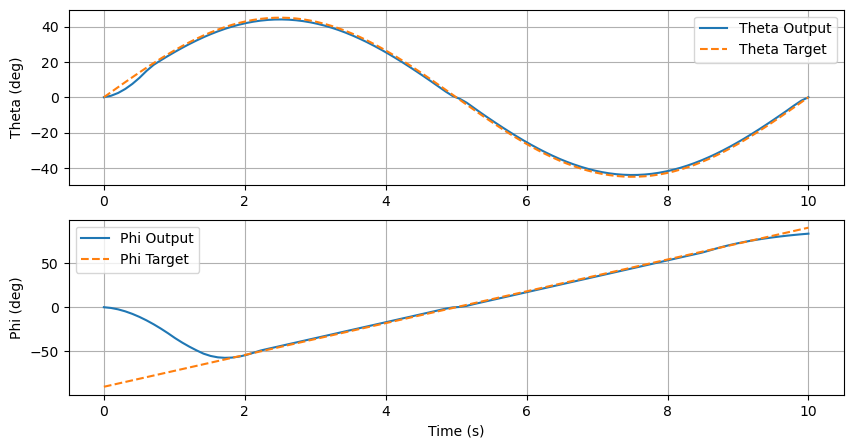

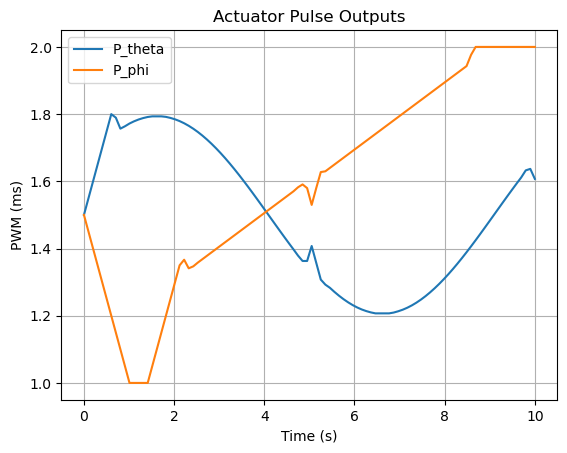

<Figure size 640x480 with 0 Axes>

In [82]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# GEKKO model
m = GEKKO(remote=False)


# Time vector
n_points = 100
t = np.linspace(0, 10, n_points)
m.time = t


P_theta = m.MV(value=1.5, lb=1.0, ub=2.0)
P_theta.STATUS = 1
P_theta.DCOST = 1
P_theta.DMAX = 0.05



P_phi = m.MV(value=1.5, lb=1.0, ub=2.0)
P_phi.STATUS = 1
P_phi.DCOST = 1
P_phi.DMAX = 0.05


theta = m.CV(value = 0, lb=-90, ub=90)
theta.STATUS = 1
theta.TR_INIT = 1
theta.TAU = 0.5

phi = m.CV(value = 0, lb=-90, ub=90)
phi.STATUS = 1 
phi.TR_INIT = 1
phi.TAU = 0.5

theta.SP = 45 * np.sin(2 * np.pi * t / 10)
phi.SP = 90 * (2 * (t / 10) - 1)


m.Equation(m.abs(theta.dt()) <= 600)
# m.Equation(theta.dt() >= -600)
m.Equation(m.abs(phi.dt()) <= 600)
# m.Equation(phi.dt() >= -600)


m.Equation(theta.dt() == -theta + 180*(P_theta - 1.5))
m.Equation(phi.dt() == -phi + 180*(P_phi - 1.5))

a1,a2,a3,a4 = 10,10,0.1,0.1

m.Obj(a1*(theta-m.Param(value=theta.SP))**2 + a2*(phi-m.Param(value=phi.SP))**2)
m.Obj((a3*P_theta + a4*P_phi))

m.options.IMODE = 6
m.solve(disp=True)


# Plot
plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
plt.plot(t, theta.value, label='Theta Output')
plt.plot(t, theta.SP, '--', label='Theta Target')
plt.ylabel('Theta (deg)')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, phi.value, label='Phi Output')
plt.plot(t, phi.SP, '--', label='Phi Target')
plt.xlabel('Time (s)')
plt.ylabel('Phi (deg)')
plt.legend()
plt.grid(True)

plt.figure()
plt.plot(t, P_theta.value, label='P_theta')
plt.plot(t, P_phi.value, label='P_phi')
plt.ylabel('PWM (ms)')
plt.xlabel('Time (s)')
plt.legend()
plt.title('Actuator Pulse Outputs')
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()